糖尿病患者数据集

流程: 
```
1. 数据读取与清洗
2. 特征工程（提取特征与细化）
3. 模型训练
4. 模型评估
```

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

In [3]:
# 加载数据集
db = load_diabetes()

In [4]:
# 分析数据集
df = pd.DataFrame(db.data, columns=db.feature_names)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [7]:
df.shape

(442, 10)

In [8]:
from scipy.stats import pearsonr

# 相关系数法看pearson系数
# 绝对值0.8-1极强相关，0.6-0.8强相关，0.4-0.6中等强度相关，0.2-0.4弱相关，0.2以下极弱相关或无相关
feature_cols = [i for i in df.columns]
features = df[feature_cols]

rate_dict = {}
for i in features.columns:
    rate_dict[i] = pearsonr(features[i], db.target)[0]
result = sorted(rate_dict.items(), key=lambda s:s[1], reverse=True)
for each in result:
    print(each)

('bmi', 0.5864501344746886)
('s5', 0.565882592442744)
('bp', 0.4414817585625711)
('s4', 0.430452884744773)
('s6', 0.38248348424858103)
('s1', 0.21202248101455068)
('age', 0.1878887507189198)
('s2', 0.17405358696874257)
('sex', 0.043061998451605396)
('s3', -0.39478925067091836)


In [81]:
# 去除pearson系数0.2以下的特征值，获得新特征值(造成误差上升)
new_feature_cols = [i for i in feature_cols if i not in ['sex']]
new_features = df[new_feature_cols]
new_features.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
# 切分数据集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(db.data, db.target, random_state=6)

/tmp/ipykernel_2576625/4025505038.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


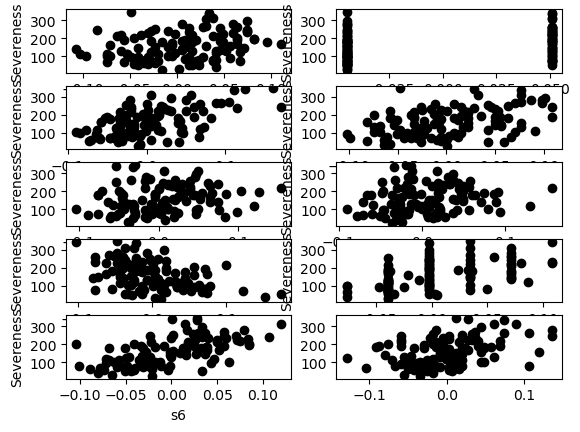

In [23]:
# 对每个数据获取散点图

for i in range(0,10):
    # 取出测试集中第 i 个特征
    xi_test = x_test[:,i]
    xi_train = x_train[:,i]
    # 将一维数组 转为 二维
    xi_test = xi_test[:,np.newaxis]
    xi_train = xi_train[:,np.newaxis]


    plt.ylabel('Severeness')
    plt.xlabel(df.columns.tolist()[i])
    plt.subplot(5,2,i+1)
    plt.scatter(xi_test,y_test,color='k')
plt.show()

In [83]:
# 模型训练 - 正规方程
from sklearn.linear_model import LinearRegression
estimator = LinearRegression(fit_intercept=True)

In [84]:
estimator.fit(x_train, y_train)

LinearRegression()

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = estimator.predict(x_test)

# 回归系数
print("Coefficient: ", estimator.coef_)

# 均方误差
print('Mean squared error :%.2f' % mean_squared_error(y_test, y_pred))
# 方差
print('Variance score :%.2f' % r2_score(y_test,y_pred))

Coefficient:  [  -48.98675053  -318.08255483   554.65179402   380.58711323
 -1054.42981694   692.92565969   186.15210198   170.15000155
   807.14392067    92.49599326]
Mean squared error :3197.92
Variance score :0.44


In [88]:
# 模型训练 - 梯度下降
from sklearn.linear_model import SGDRegressor
estimator = SGDRegressor(loss='squared_error', fit_intercept=True, learning_rate='invscaling', eta0=0.01)

In [89]:
estimator.fit(x_train, y_train)

/data/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = estimator.predict(x_test)

# 回归系数
print("Coefficient: ", estimator.coef_)

# 均方误差
print('Mean squared error :%.2f' % mean_squared_error(y_test, y_pred))
# 方差
print('Variance score :%.2f' % r2_score(y_test,y_pred))

Coefficient:  [  37.17918243  -58.63468205  249.59923283  179.16631797   38.14476024
   13.89409879 -137.05610234  119.96938773  214.37771498  125.57065725]
Mean squared error :3285.16
Variance score :0.43


In [92]:
# 模型训练 - 岭回归（采用L2 Ridge正则优化方式的线性回归）（采用L1的是LASSO，在SGD里面设定penalty='l1'可以实现）
from sklearn.linear_model import Ridge
estimator = Ridge(alpha=1.0, fit_intercept=True, solver="auto")

In [93]:
estimator.fit(x_train, y_train)

Ridge()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = estimator.predict(x_test)

# 回归系数
print("Coefficient: ", estimator.coef_)

# 均方误差
print('Mean squared error :%.2f' % mean_squared_error(y_test, y_pred))
# 方差
print('Variance score :%.2f' % r2_score(y_test,y_pred))

Coefficient:  [  19.88173196  -99.11932806  281.3042144   195.84101647   11.24695327
  -16.32865938 -137.11663341  101.01335653  227.99179596  113.3762756 ]
Mean squared error :3278.23
Variance score :0.43
